In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import pandas as pd
import re

# Initialize an empty list to store data for the DataFrame
data = []

# Define the path to your text file
file_path = '/content/drive/MyDrive/Abreviation/CASI/CASI.txt'

# Read the file line by line
with open(file_path, 'r',encoding='utf-8', errors='ignore') as file:
  for line in file:
    # Split the line by the '|' delimiter
    parts = line.split('|')

    # Extract elements based on the expected format
    if len(parts) >= 7:  # Ensure the line has the expected number of fields
        abr = parts[0]
        long_form = parts[1]
        abr_text = parts[2]
        start_abr = int(parts[3])
        end_abr = int(parts[4])
        section = parts[5]  # May be empty if no section is specified
        text = parts[6]

        # Append the extracted fields to the data list as a dictionary
        data.append({
            'abr': abr,
            'long': long_form,
            'abr_text': abr_text,
            'start_abr': start_abr,
            'end_abr': end_abr,
            'section': section,
            'text': text
        })

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Display the resulting DataFrame
print(df)


       abr                                      long abr_text  start_abr  \
0       AB                                  abortion      AB.        231   
1       AB                                  abortion      AB.        249   
2       AB                                  abortion       AB        223   
3       AB                                  abortion      AB.        194   
4       AB                                  abortion       AB        114   
...    ...                                       ...      ...        ...   
37495  VAD  vincristine adriamycin and dexamethasone     VAD.        139   
37496  VAD  vincristine adriamycin and dexamethasone     VAD,        172   
37497  VAD  vincristine adriamycin and dexamethasone      VAD        250   
37498  VAD  vincristine adriamycin and dexamethasone      VAD        181   
37499  VAD  vincristine adriamycin and dexamethasone      VAD         60   

       end_abr                         section  \
0          233                       

In [ ]:
data=pd.DataFrame(df, columns=('abr','long','text'))

In [ ]:
# Define the target abbreviations
df=data
abbreviations = ["AMA", "ASA", "BAL","BK","C3","CVA","CVP","CVS","ER","FISH","NAD","OTC","SBP"]

# Filter rows containing any of the abbreviations
filtered_df = df[df["abr"].str.contains('|'.join(abbreviations), flags=re.IGNORECASE, na=False)]

# Sample 500 rows from the filtered data
#df_mini = filtered_df.sample(n=600, replace=False, random_state=1992)


In [ ]:
# Check the distribution of abbreviations in the sampled data
print(filtered_df['abr'].value_counts())


abr
AMA     500
ASA     500
BAL     500
BK      500
C3      500
CVA     500
CVP     500
CVS     500
ER      500
FISH    500
NAD     500
OTC     500
SBP     500
Name: count, dtype: int64


<ipython-input-67-7a1c6d889c31>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mini['text_length'] = df_mini['text'].apply(len)  # Character count
<ipython-input-67-7a1c6d889c31>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mini['token_count'] = df_mini['text'].apply(lambda x: len(x.split()))  # Token count using NLTK's word_tokenize


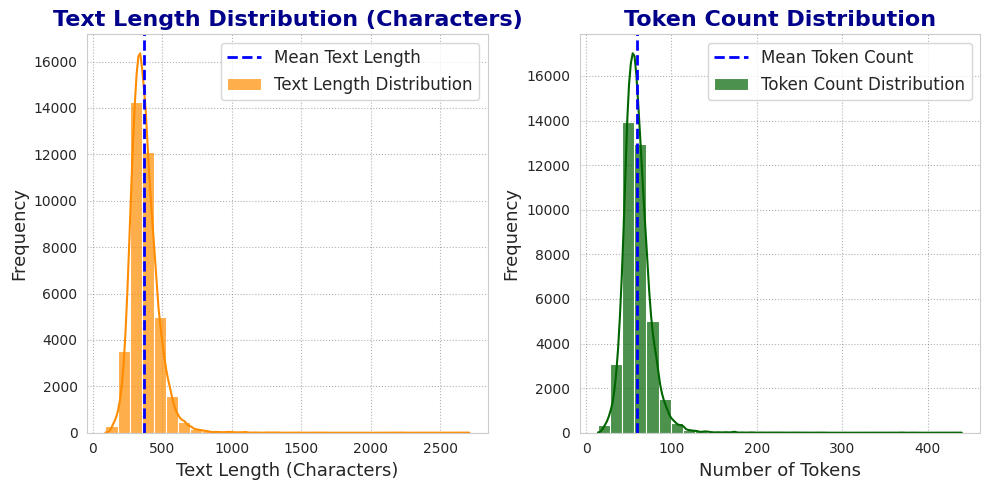

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Example: Tokenizing and calculating text lengths and token counts
df_mini['text_length'] = df_mini['text'].apply(len)  # Character count
df_mini['token_count'] = df_mini['text'].apply(lambda x: len(x.split()))  # Token count using NLTK's word_tokenize

# Set up a figure with subplots for both distributions
plt.figure(figsize=(10, 5))

# Plotting the text length distribution (in characters)
plt.subplot(1, 2, 1)  # First subplot
sns.histplot(df['text_length'], bins=30, kde=True, color='darkorange', alpha=0.7, label='Text Length Distribution')
plt.axvline(df['text_length'].mean(), color='blue', linestyle='--', linewidth=2, label='Mean Text Length')
#plt.axvline(df['text_length'].median(), color='green', linestyle='-', linewidth=2, label='Median Text Length')
plt.title('Text Length Distribution (Characters)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Text Length (Characters)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(visible=True, linestyle=':', color='gray', alpha=0.6)
plt.legend(fontsize=12, loc='upper right')

# Plotting the token count distribution
plt.subplot(1, 2, 2)  # Second subplot
sns.histplot(df['token_count'], bins=30, kde=True, color='darkgreen', alpha=0.7, label='Token Count Distribution')
plt.axvline(df['token_count'].mean(), color='blue', linestyle='--', linewidth=2, label='Mean Token Count')
#plt.axvline(df['token_count'].median(), color='green', linestyle='-', linewidth=2, label='Median Token Count')
plt.title('Token Count Distribution', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Number of Tokens', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(visible=True, linestyle=':', color='gray', alpha=0.6)
plt.legend(fontsize=12, loc='upper right')

# Adjust layout to ensure there is no overlap
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
X_train.to_csv('/content/drive/MyDrive/Abreviation/CASI/train_13.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/Abreviation/CASI/X_test_13.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/Abreviation/CASI/y_train_13.csv', index=False)
y_test .to_csv('/content/drive/MyDrive/Abreviation/CASI/y_test_13.csv', index=False)

In [ ]:
data=filtered_df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np


# Combine `abr` with `text` for better context
data['text_with_abr'] = data['abr'] + " " + data['text']

# Encode target labels
label_encoder = LabelEncoder()
data['long_encoded'] = label_encoder.fit_transform(data['long'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data['text_with_abr'], data['long_encoded'], test_size=0.20, shuffle=True
)
print(X_train.shape)
print(X_test.shape)
# Vectorize the text
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


<ipython-input-39-27f984ccf416>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_with_abr'] = data['abr'] + " " + data['text']
<ipython-input-39-27f984ccf416>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['long_encoded'] = label_encoder.fit_transform(data['long'])


(5200,)
(1300,)


In [ ]:
import pandas as pd
import joblib
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
save_dir = "/content/drive/MyDrive/Abreviation/CASI/mini/"  # Change to your preferred directory
joblib.dump(label_encoder, "/content/drive/MyDrive/Abreviation/CASI/mini/label_encoder.pkl")
# Save the TF-IDF vectorizer
joblib.dump(vectorizer, "/content/drive/MyDrive/Abreviation/CASI/mini/vectorizer.pkl")
# Function to manually tune hyperparameters


# Hyperparameter grids
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'probability': [True]
}
best_model = None
best_score = 0
best_params = None

# Generate all combinations of hyperparameters
from itertools import product
param_combinations = list(product(*svm_param_grid.values()))
model= SVC(random_state=42)
for params in param_combinations:
    # Set parameters for the model
    param_dict = dict(zip(svm_param_grid.keys(), params))
    model.set_params(**param_dict)

    # Train and evaluate on the validation set
    model.fit(X_train_tfidf, y_train)
    y_valid_pred = model.predict(X_test_tfidf)
    f1 = f1_score(y_test, y_valid_pred, average='micro', zero_division=0)
    if f1 > best_score:
        best_score = f1
        best_model = model
        best_params = param_dict
print(f"Best parameters for {model.__class__.__name__}: {best_params}, F1-Score: {best_score:.4f}")
joblib.dump(best_model, f"{save_dir}svm_model.pkl")
svm=best_model

Best parameters for SVC: {'C': 1, 'kernel': 'linear', 'probability': True}, F1-Score: 0.9769


In [ ]:
svm=best_model

In [ ]:
import pandas as pd
import joblib
import numpy as np
from itertools import product
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#save_dir = "/content/drive/MyDrive/Abreviation/CASI/hyper"
best_model = None
best_score = 0
best_params = None
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
param_combinations = list(product(*rf_param_grid.values()))
model= RandomForestClassifier(random_state=42)
for params in param_combinations:
    # Set parameters for the model
    param_dict = dict(zip(rf_param_grid.keys(), params))
    model.set_params(**param_dict)

    # Train and evaluate on the validation set
    model.fit(X_train_tfidf, y_train)
    y_valid_pred = model.predict(X_test_tfidf)
    f1 = f1_score(y_test, y_valid_pred, average='micro', zero_division=0)
    print(params,'     f1-score',f1)
    if f1 > best_score:
        best_score = f1
        best_model = model
        best_params = param_dict

print(f"Best parameters for {model.__class__.__name__}: {best_params}, F1-Score: {best_score:.4f}")
joblib.dump(best_model, f"{save_dir}rf_model.pkl")
rf=best_model


(100, None, 2, 1)      f1-score 0.9538461538461539
(100, None, 2, 2)      f1-score 0.9476923076923077
(100, None, 5, 1)      f1-score 0.9546153846153846
(100, None, 5, 2)      f1-score 0.9446153846153846
(100, 10, 2, 1)      f1-score 0.9123076923076923
(100, 10, 2, 2)      f1-score 0.9061538461538462
(100, 10, 5, 1)      f1-score 0.9046153846153846
(100, 10, 5, 2)      f1-score 0.9084615384615384
(100, 20, 2, 1)      f1-score 0.9338461538461539
(100, 20, 2, 2)      f1-score 0.9307692307692308
(100, 20, 5, 1)      f1-score 0.93
(100, 20, 5, 2)      f1-score 0.9276923076923077
(200, None, 2, 1)      f1-score 0.9553846153846154
(200, None, 2, 2)      f1-score 0.9461538461538461
(200, None, 5, 1)      f1-score 0.9553846153846154
(200, None, 5, 2)      f1-score 0.946923076923077
(200, 10, 2, 1)      f1-score 0.9092307692307692
(200, 10, 2, 2)      f1-score 0.9092307692307692
(200, 10, 5, 1)      f1-score 0.9115384615384615
(200, 10, 5, 2)      f1-score 0.9107692307692308
(200, 20, 2, 1)    

In [ ]:
import pandas as pd
import joblib
import numpy as np
from itertools import product
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
################# last
best_model = None
best_score = 0
best_params = None
lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'newton-cg']
}
param_combinations = list(product(*lr_param_grid.values()))
model= LogisticRegression(max_iter=1000, random_state=42)
for params in param_combinations:
    # Set parameters for the model
    param_dict = dict(zip(lr_param_grid.keys(), params))
    model.set_params(**param_dict)

    # Train and evaluate on the validation set
    model.fit(X_train_tfidf, y_train)
    y_valid_pred = model.predict(X_test_tfidf)
    f1 = f1_score(y_test, y_valid_pred, average='micro', zero_division=0)
    print(params,'     f1-score',f1)
    if f1 > best_score:
        best_score = f1
        best_model = model
        best_params = param_dict
# Save individual models
joblib.dump(best_model , f"{save_dir}lr_model.pkl")
lr=best_model
print(f"Best parameters for {model.__class__.__name__}: {best_params}, F1-Score: {best_score:.4f}")


(0.1, 'l2', 'lbfgs')      f1-score 0.8638461538461538
(0.1, 'l2', 'newton-cg')      f1-score 0.8646153846153846
(1, 'l2', 'lbfgs')      f1-score 0.9492307692307692
(1, 'l2', 'newton-cg')      f1-score 0.9492307692307692
(10, 'l2', 'lbfgs')      f1-score 0.97
(10, 'l2', 'newton-cg')      f1-score 0.9692307692307692
Best parameters for LogisticRegression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}, F1-Score: 0.9700


In [ ]:
print(f"Best parameters for {model.__class__.__name__}: {best_params}, F1-Score: {best_score:.4f}")

Best parameters for LogisticRegression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}, F1-Score: 0.9462


In [ ]:
svm = joblib.load("{save_dir}svm_model.pkl")

In [ ]:
print(svm.get_params())
print(lr.get_params())
print(rf.get_params())

{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
{'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
ensemble1 = VotingClassifier(estimators=[
    ('svm', svm),
    ('rf', rf),
    ('lr', lr)
], voting='soft')  # 'soft' uses probabilities, 'hard' uses majority voting
ensemble1.fit(X_train_tfidf, y_train)
# Save the ensemble model
joblib.dump(ensemble1, f"{save_dir}ensemble_model1.pkl")


['/content/drive/MyDrive/Abreviation/CASI/mini/ensemble_model1.pkl']

In [ ]:
# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='micro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='micro', zero_division=0)
    return accuracy, precision, recall, f1

# Evaluate each model
models = {'SVM': svm, 'Random Forest': rf, 'Logistic Regression': lr, 'Ensemble': ensemble1}
print('\nTest Set Evaluation:')
for model_name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_test_tfidf, y_test)
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

print('\nTrain Set Evaluation:')
for model_name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train_tfidf, y_train)
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")


Test Set Evaluation:
SVM - Accuracy: 0.9631, Precision: 0.9631, Recall: 0.9631, F1-Score: 0.9631
Random Forest - Accuracy: 0.9331, Precision: 0.9331, Recall: 0.9331, F1-Score: 0.9331
Logistic Regression - Accuracy: 0.9692, Precision: 0.9692, Recall: 0.9692, F1-Score: 0.9692
Ensemble - Accuracy: 0.9715, Precision: 0.9715, Recall: 0.9715, F1-Score: 0.9715

Train Set Evaluation:
SVM - Accuracy: 0.9996, Precision: 0.9996, Recall: 0.9996, F1-Score: 0.9996
Random Forest - Accuracy: 0.9556, Precision: 0.9556, Recall: 0.9556, F1-Score: 0.9556
Logistic Regression - Accuracy: 0.9994, Precision: 0.9994, Recall: 0.9994, F1-Score: 0.9994
Ensemble - Accuracy: 0.9994, Precision: 0.9994, Recall: 0.9994, F1-Score: 0.9994


#weighted

In [ ]:
# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1


print('\nTest Set Evaluation:')
for model_name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_test_tfidf, y_test)
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

print('\nTrain Set Evaluation:')
for model_name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train_tfidf, y_train)
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")


Test Set Evaluation:
SVM - Accuracy: 0.9631, Precision: 0.9605, Recall: 0.9631, F1-Score: 0.9574
Random Forest - Accuracy: 0.9331, Precision: 0.9212, Recall: 0.9331, F1-Score: 0.9152
Logistic Regression - Accuracy: 0.9692, Precision: 0.9660, Recall: 0.9692, F1-Score: 0.9651
Ensemble - Accuracy: 0.9715, Precision: 0.9695, Recall: 0.9715, F1-Score: 0.9684

Train Set Evaluation:
SVM - Accuracy: 0.9996, Precision: 0.9996, Recall: 0.9996, F1-Score: 0.9996
Random Forest - Accuracy: 0.9556, Precision: 0.9479, Recall: 0.9556, F1-Score: 0.9452
Logistic Regression - Accuracy: 0.9994, Precision: 0.9994, Recall: 0.9994, F1-Score: 0.9994
Ensemble - Accuracy: 0.9994, Precision: 0.9990, Recall: 0.9994, F1-Score: 0.9992


#End